In [1]:
from src.api.the_graph import GraphUniswapV3
from src.misc.data import format_dtypes

import pandas as pd
from matplotlib import pyplot as plt

In [2]:
ts = 1672834013
pair = "WBTC-ETH"

In [4]:
uniswap_graph = GraphUniswapV3()
swaps = uniswap_graph.get_swaps(pair=pair, ts_gte=ts, amount=110)

In [5]:
df = pd.DataFrame(swaps)
df = format_dtypes(df, uniswap_graph.column_dtypes)
df.head()

,amount0In,amount0Out,amount1In,amount1Out,id,sender,to,timestamp,pair,transaction,token0Price,token1Price,token0_symbol,token0_decimals,token1_symbol,token1_decimals,reserve1,reserve0,blockNumber
0,249.958733,0.000000,0.000000,0.198995,0xc47bea5eef61ac7fd5f10e362f98eb4f75fbb433ff1b...,0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45,0x309551af5924cd1d0a0e5dae9478f44dcac5b968,1672834043,{'token0Price': '1261.332459560792548875242069...,{'blockNumber': '16333321'},1261.332459560792548875242069097274,0.0007928123885341134472890670132410751,USDC,6,WETH,18,33736.098035770161365058,42552435.511442,16333321
1,0.000000,408.713906,0.327327,0.000000,0x3160b68667ddcee84cc5b3333b986fa121b64c94b313...,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x324ec7743a70212299ae82ad674f7547e6b4069d,1672834079,{'token0Price': '1261.332459560792548875242069...,{'blockNumber': '16333324'},1261.332459560792548875242069097274,0.0007928123885341134472890670132410751,USDC,6,WETH,18,33736.098035770161365058,42552435.511442,16333324
2,1067.547941,0.000000,0.000000,0.849860,0xc00ba22fe1bdd8a8a48e594c172c0e446b0cc0827f98...,0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45,0x3dd49f67e9d5bc4c5e6634b3f70bfd9dc1b6bd74,1672834079,{'token0Price': '1261.332459560792548875242069...,{'blockNumber': '16333324'},1261.332459560792548875242069097274,0.0007928123885341134472890670132410751,USDC,6,WETH,18,33736.098035770161365058,42552435.511442,16333324
3,0.000000,247.539000,0.198250,0.000000,0x7e30a695ce540d1810e69a6b4f8898558fc6a441f15c...,0xdef171fe48cf0115b1d80b88dc8eab59176fee57,0x1221f327f02daf75c1d9291dc9026d2f444ee360,1672834151,{'token0Price': '1261.332459560792548875242069...,{'blockNumber': '16333330'},1261.332459560792548875242069097274,0.0007928123885341134472890670132410751,USDC,6,WETH,18,33736.098035770161365058,42552435.511442,16333330
4,232.615779,0.000000,0.000000,0.185182,0xca285c338d04a04281ddcece1781bbb74cd66251d45d...,0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45,0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45,1672834163,{'token0Price': '1261.332459560792548875242069...,{'blockNumber': '16333331'},1261.332459560792548875242069097274,0.0007928123885341134472890670132410751,USDC,6,WETH,18,33736.098035770161365058,42552435.511442,16333331


(array([45., 16., 18.,  3.,  5.,  6.,  6.,  1.,  2.,  0.,  1.,  1.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  1.,
         0.,  1.,  0.,  1.]),
 array([1.00000000e-03, 1.44956351e-01, 2.88912702e-01, 4.32869053e-01,
        5.76825404e-01, 7.20781755e-01, 8.64738106e-01, 1.00869446e+00,
        1.15265081e+00, 1.29660716e+00, 1.44056351e+00, 1.58451986e+00,
        1.72847621e+00, 1.87243256e+00, 2.01638891e+00, 2.16034527e+00,
        2.30430162e+00, 2.44825797e+00, 2.59221432e+00, 2.73617067e+00,
        2.88012702e+00, 3.02408337e+00, 3.16803972e+00, 3.31199607e+00,
        3.45595243e+00, 3.59990878e+00, 3.74386513e+00, 3.88782148e+00,
        4.03177783e+00, 4.17573418e+00, 4.31969053e+00]),
 <BarContainer object of 30 artists>)

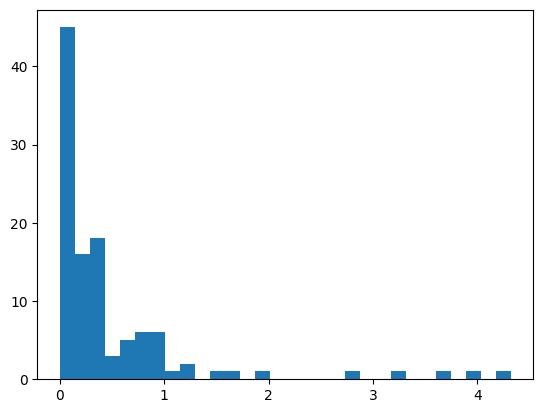

In [7]:
tradesize_eth = df["amount1In"] + df["amount1Out"]
plt.hist(tradesize_eth.values, bins=30)